# **IMPORT LIBS**

In [1]:
import pandas as pd
import sys
from collections import Counter
from tqdm import tqdm

recommenders_path = 'Recommenders'
sys.path.append(recommenders_path)

graphs_path = 'Graphs'
sys.path.append(graphs_path)

spotify_path = 'Spotify'
sys.path.append(spotify_path)

graphics_path = 'Graphics'
sys.path.append(graphics_path)

from Recommenders.StrongerConnectionsRecommender import StrongerConnectionsRecommender
from Recommenders.PopularityRecommender import PopularityRecommender
from Graphs.SimpleGraph import SimpleGraph
from Graphs.BipartiteGraph import BipartiteGraph
from Graphics.Graphics import Graphics

# **Loading the data**

In [2]:
df = pd.read_csv('../data/spotify_artists.csv')
df

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
14783,https://open.spotify.com/artist/7EyzyrMNgqiK8b...,1417807,rap mineiro,7EyzyrMNgqiK8bMrbkOT9l,Sidoka,59,spotify:artist:7EyzyrMNgqiK8bMrbkOT9l,"4oPnjkJcLqOim9KJxvIYMz, 1QBWA6tuiZ0JuDluPqbe71..."
14784,https://open.spotify.com/artist/6gzXCdfYfFe5XK...,2313438,"k-pop, k-pop boy group",6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR,58,spotify:artist:6gzXCdfYfFe5XKhPKkYqxV,"6nVMMEywS5Y4tsHPKx1nIo, 1bkpTEmumLC3xc7HgMsttU..."
14785,https://open.spotify.com/artist/7AAXcP4NpvvLM9...,609413,"sertanejo, sertanejo universitario",7AAXcP4NpvvLM9Xcfy64ij,Hugo Pena & Gabriel,40,spotify:artist:7AAXcP4NpvvLM9Xcfy64ij,"5Dyg6H3QJHQV5c7ojyKWyv, 4ZUahcHoVxr4lsrfdmhjhV..."
14786,https://open.spotify.com/artist/5KvkOKroKLz202...,186296,"folk metal, german metal, melodic death metal,...",5KvkOKroKLz202ioXfGWR2,Equilibrium,49,spotify:artist:5KvkOKroKLz202ioXfGWR2,3t5X2CVDf5mrlIx1SdvWYM


# **Creating the complex network related to the Popularity Recommender**



## **Creating the Bipartite Network (genres and artists)**

In [3]:
edges = []
for i in range(len(df)):
    genres_artist = df['genres'][i].split(', ')
    for g in genres_artist:
        edge = (df['id'][i], g, df['popularity'][i])
        edges.append(edge)

In [4]:
artists_nodes = [(df['id'][index], dict(popularity=int(df['popularity'][index]), name=str(df['name'][index]), genre=str(df['genres'][index].split(', ')[0]))) for index in range(len(df['id']))]
genres_nodes = set([item.strip() for sublist in df['genres'].dropna().apply(lambda x: x.split(',')) for item in sublist])

In [5]:
Bipartite_G = BipartiteGraph()
Bipartite_G.add_nodes(artists_nodes, genres_nodes)
Bipartite_G.add_edges(edges)

## **Creating the Simple Network (artists)**

* **To analyze the network, we will not consider the vertices that represent genres, as the bipartite format was used solely to facilitate the recommendation process. Thus, to simplify the analysis, we will create a network, derived from the bipartite one, where all vertices connected through a genre are linked to each other, with the weight of these connections set to 1**

In [6]:
G_from_Bipartite = Bipartite_G.transform_bipartite_into_simple(list(df['id']))
name_network = 'network_from_Popularity_Recommender'

## **Analyzing the network**

### **Basic information**

In [7]:
print(f'Number of nodes: {G_from_Bipartite.get_number_of_nodes()}')
print(f'Number of edges: {G_from_Bipartite.get_number_of_edges()}')
print(f'Number of components: {G_from_Bipartite.get_number_connected_components()}')
print(f'Smallest degree in the network: {G_from_Bipartite.get_minimum_degree()}')
print(f'Largest degree in the network: {G_from_Bipartite.get_maximum_degree()}')
print(f'Average degree of the network: {G_from_Bipartite.get_average_degree()}')
print(f'Network density: {G_from_Bipartite.get_density()}')
#print(f'Average distance: {G_from_Bipartite.average_shortest_path_length()}')
#average_clustering_coefficient, percentage_of_considered_nodes = G_from_Bipartite.get_average_clustering_coefficient()
#print(f'Average clustering coefficient: {average_clustering_coefficient} ({percentage_of_considered_nodes:.2%} of the network was considered in the calculation, which have a degree greater than one)')

Number of nodes: 14788
Number of edges: 774610
Number of components: 118
Smallest degree in the network: 1
Largest degree in the network: 768
Average degree of the network: 104.76196916418718
Network density: 0.0070847345076206925


### **Degree distribution**

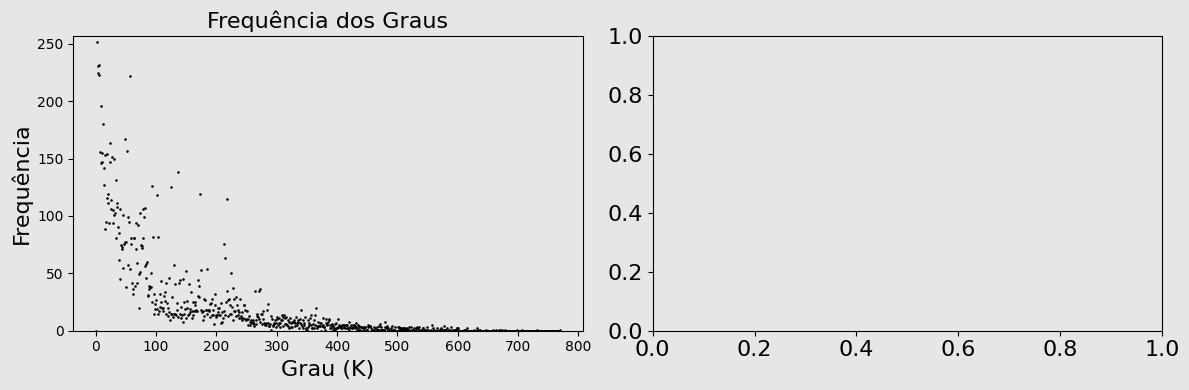

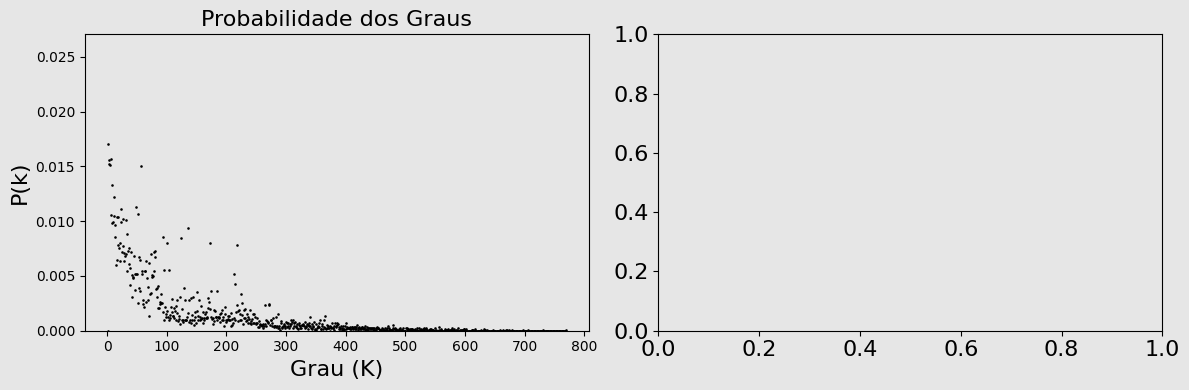

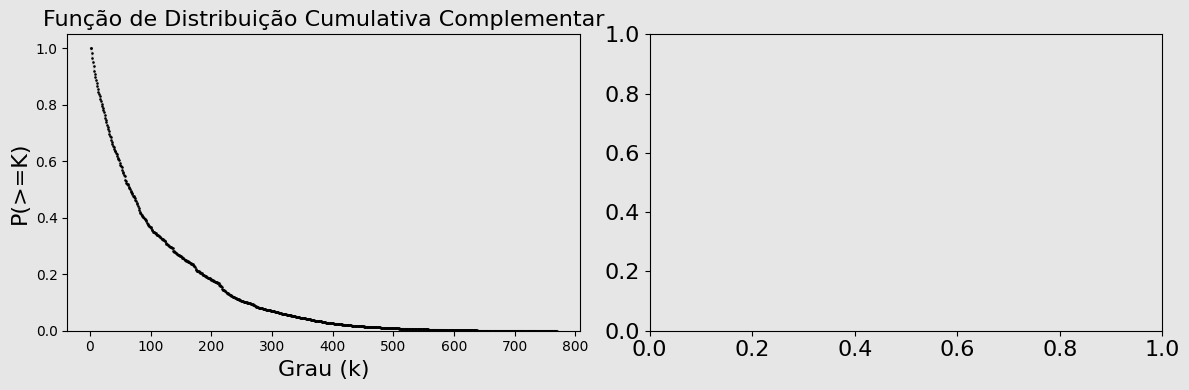

In [8]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = G_from_Bipartite.get_degree_distribution()
Graphics.create_graphic_degrees(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = name_network)
Graphics.create_graphic_degrees(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = name_network)
Graphics.create_graphic_degrees(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = name_network)

### **Centralities**

#### **Degree Centrality**

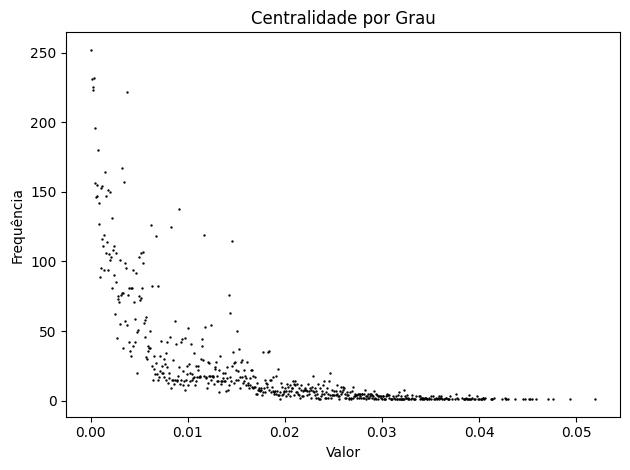

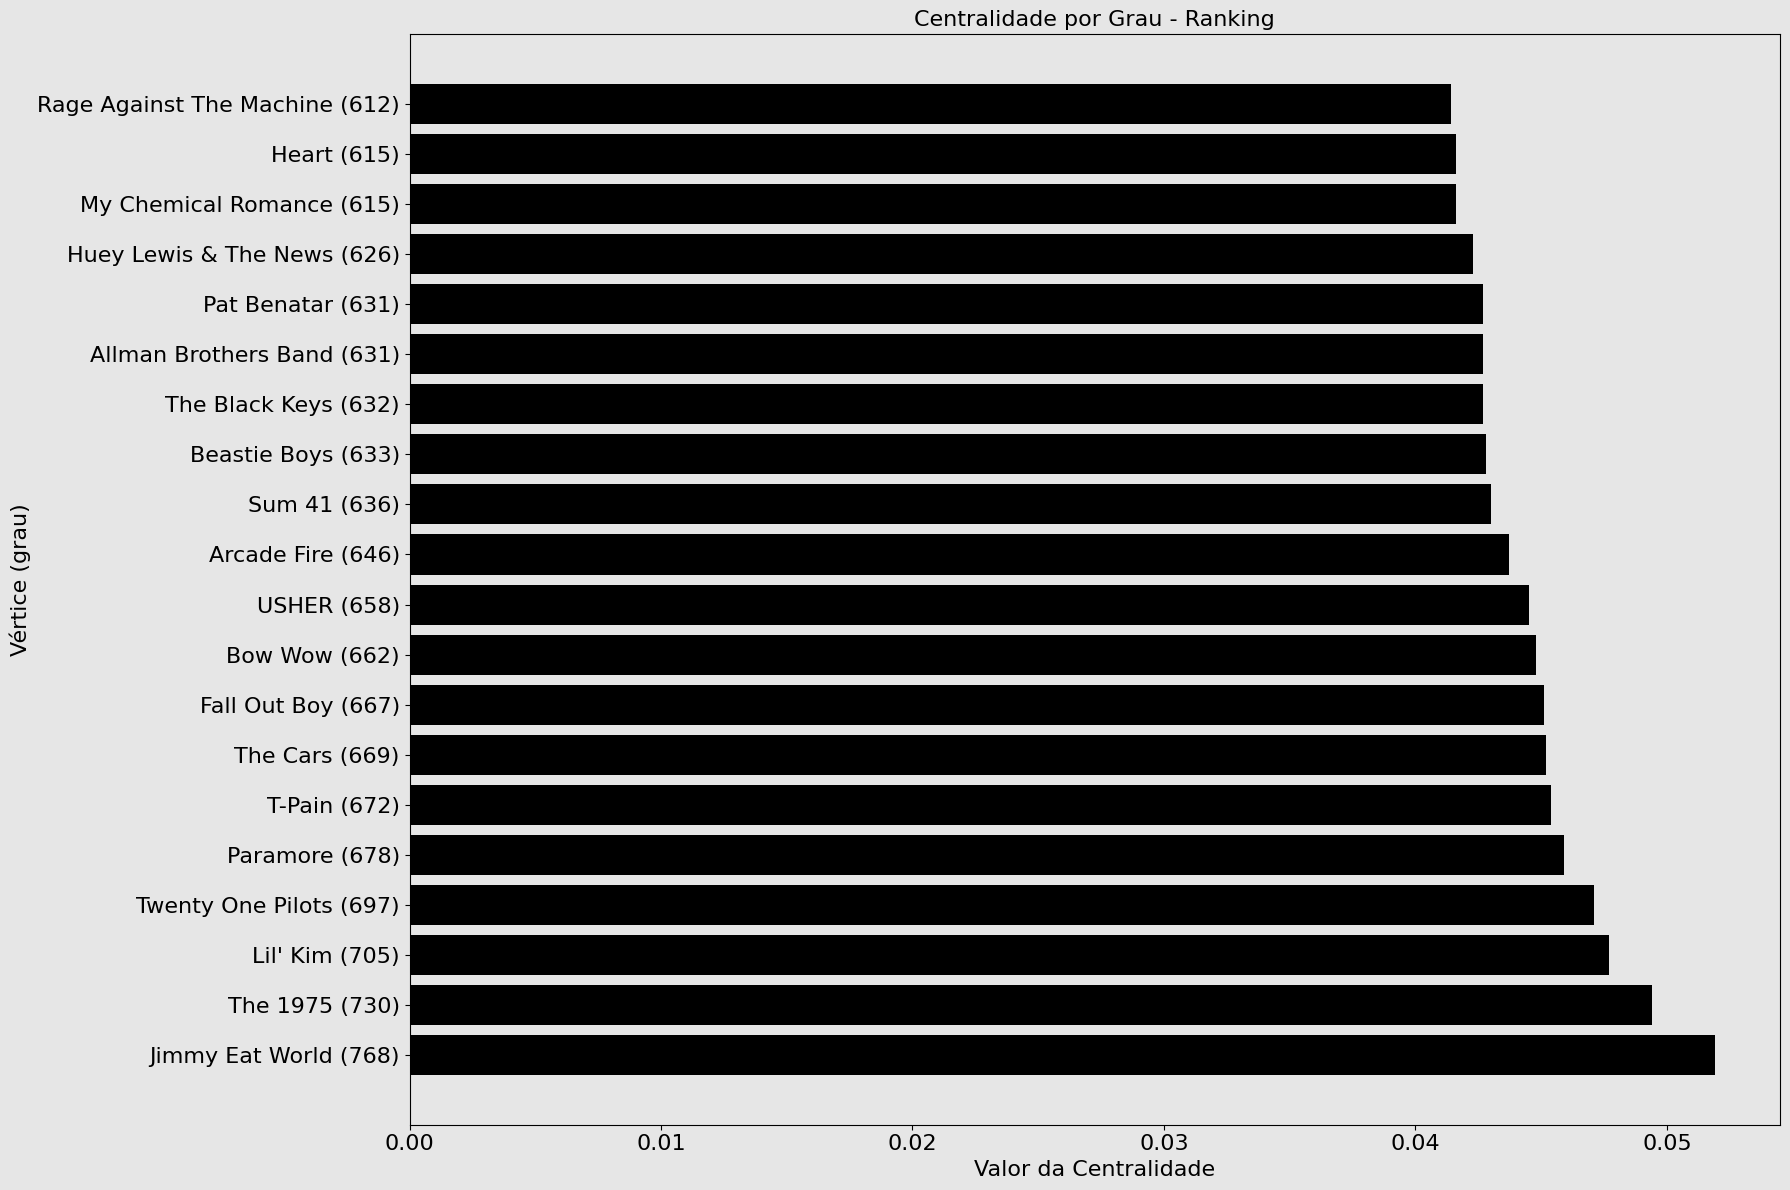

In [9]:
degree_centrality = G_from_Bipartite.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title='Centralidade por Grau', name_network=name_network)
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title='Centralidade por Grau - Ranking', name_network=name_network)

#### **Eigenvector Centrality**

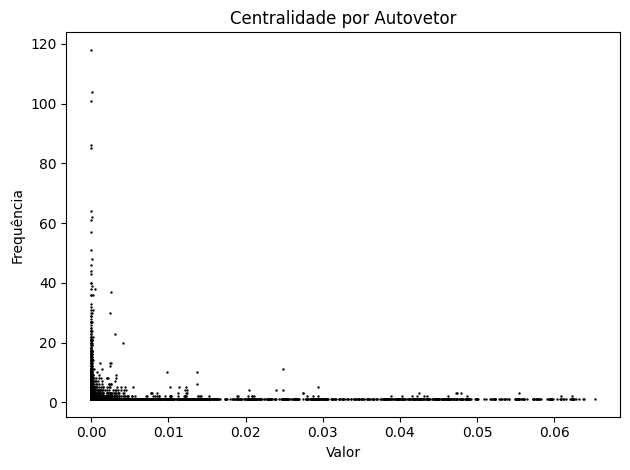

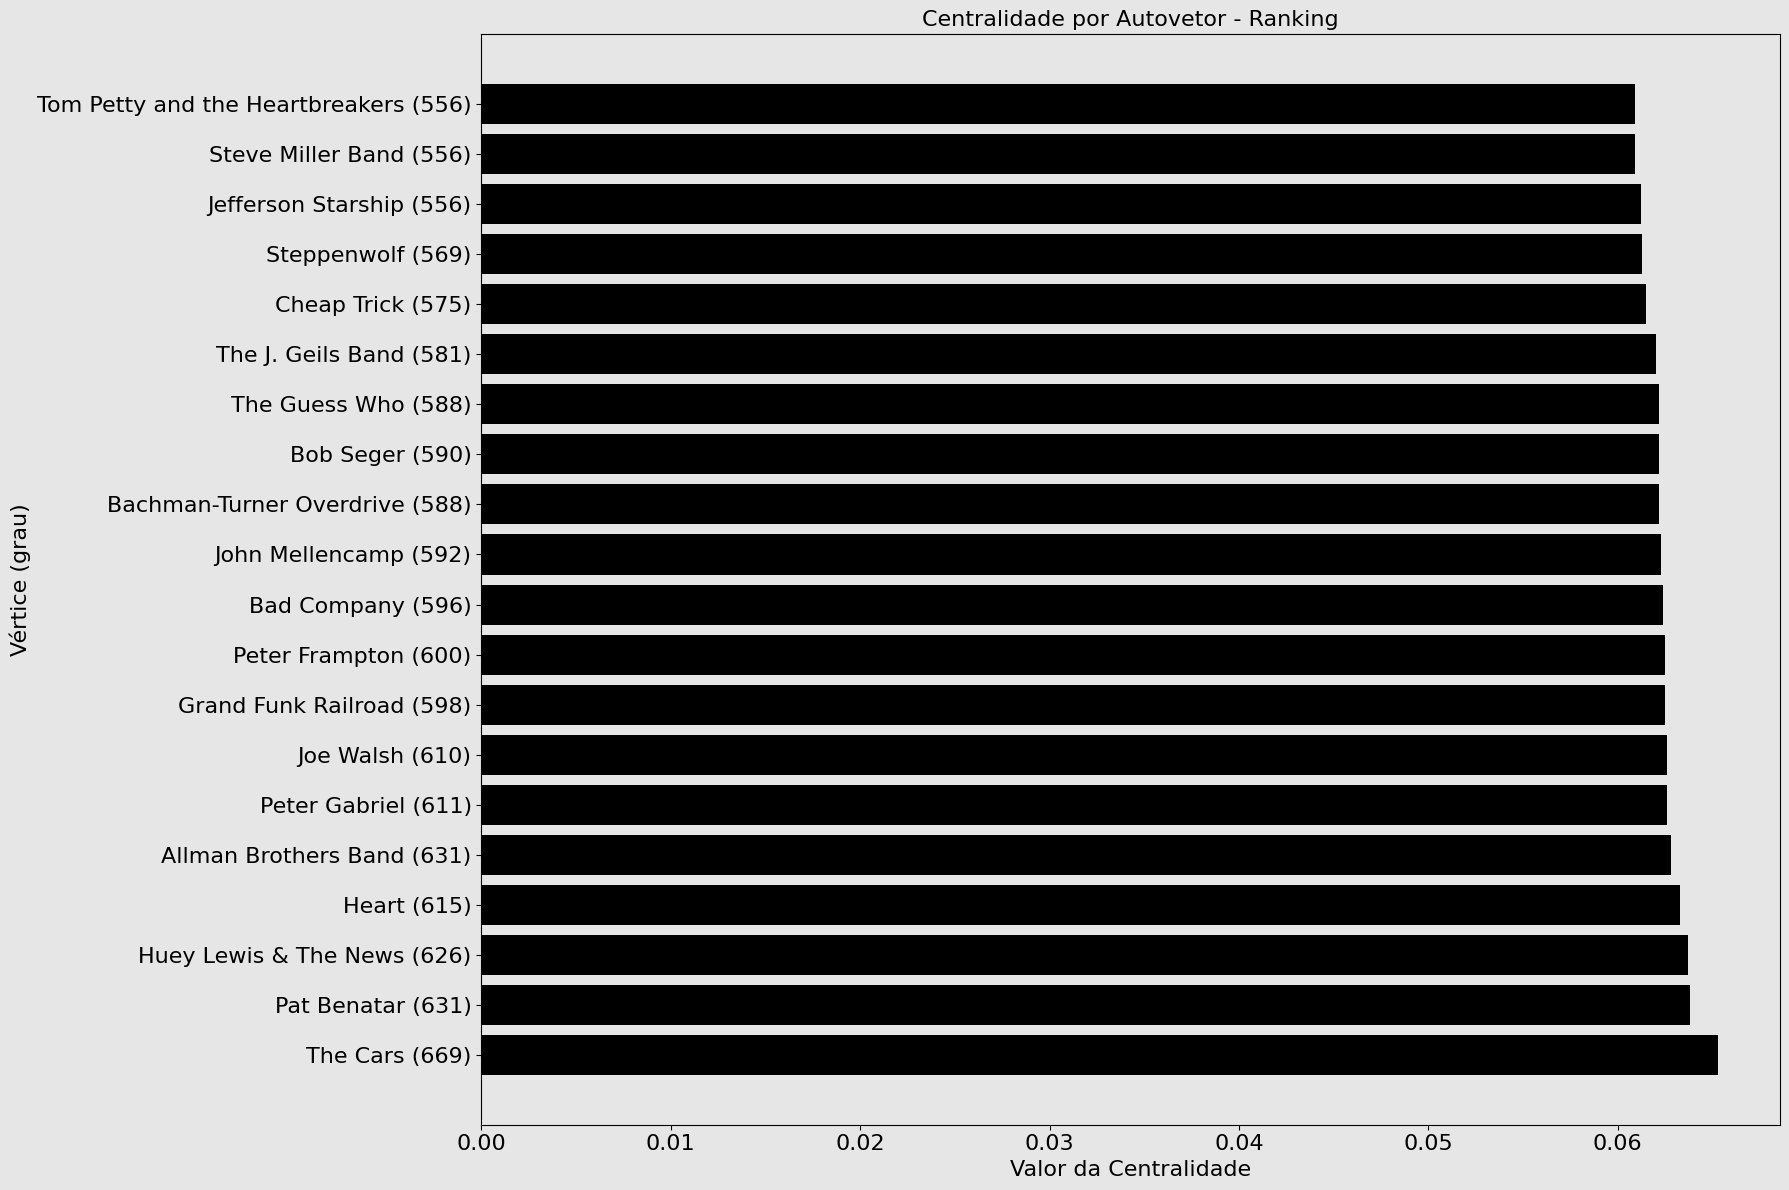

In [10]:
eigenvector_centrality = G_from_Bipartite.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title='Centralidade por Autovetor', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_from_Bipartite, title='Centralidade por Autovetor - Ranking', name_network=name_network)

### **Communities**

In [11]:
louvain_communities = G_from_Bipartite.get_louvain_communities()
sorted_louvain_communities = sorted(louvain_communities, key=len, reverse=True)

In [12]:
for index, community in enumerate(sorted_louvain_communities):
    print(f'Community {index+1:2}', end=' ')
    community_list = []
    for artist_id in community:
        community_list.append(G_from_Bipartite.graph.nodes[artist_id]['name'])
    print(f'(size: {len(community_list):4}): ', ' | '.join(community_list))

Community  1 (size: 1938):  Europe | KALEO | The Flying Burrito Brothers | Colony House | Poets of the Fall | Michael Bolton | Daisy the Great | Bad Company | The Buggles | Dionne Warwick | Steely Dan | Rammstein | Lustra | Tesla | Smash Mouth | Seal | HammerFall | KISS | Orgy | Trans-X | The Stone Roses | Yeasayer | D.R.I. | The Rapture | Oliver Hazard | Bad Wolves | Hayden Calnin | The Cardigans | Los Lobos | Great Good Fine Ok | Outta Pocket | ? & The Mysterians | Amaranthe | Lebanon Hanover | Utopia | Eddie Rabbitt | The Unseen | Caroline Polachek | UNKLE | From Ashes to New | Justice | The Knack | Once Monsters | Jane's Addiction | The Floozies | Foreigner | Little Feat | Oh The Larceny | The Union Underground | Crowded House | Tom Rosenthal | The Human League | Outskrts | Fat Freddy's Drop | Foghat | Islands | Petula Clark | Gary Clark Jr. | Black Label Society | Rival Sons | Madness | Slowdive | Talking Heads | George Martin | Wye Oak | Yeah Yeah Yeahs | Panda Bear | Robbie Dupr

### **Analyzing centrality in some previous communities**

#### **Auxiliary function**

In [13]:
def create_newtok_based_on_a_community(graph, nodes_community):
    edges_community_aux = []
    
    for i in range(len(nodes_community)):
        for j in range(i+1, len(nodes_community)):
            if graph.graph.has_edge(nodes_community[i], nodes_community[j]) or graph.graph.has_edge(nodes_community[j], nodes_community[i]):    
                artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])
                edges_community_aux.append((artist_1, artist_2))
    
    counter = Counter(edges_community_aux)
    edges_community = []
    
    for artists, weight in counter.items():
        artist_1, artist_2 = artists
        edges_community.append((artist_1, artist_2, weight))

    G_Community = SimpleGraph()
    G_Community.add_nodes(nodes_community)
    G_Community.add_edges(edges_community)

    return G_Community


#### **Community 1**

In [14]:
number_community = 0
nodes_community = list(sorted_louvain_communities[number_community])
G_Community = create_newtok_based_on_a_community(G_from_Bipartite, nodes_community)

In [15]:
print(f'Number of nodes: {G_Community.get_number_of_nodes()}')
print(f'Number of edges: {G_Community.get_number_of_edges()}')
print(f'Number of components: {G_Community.get_number_connected_components()}')
print(f'Smallest degree in the network: {G_Community.get_minimum_degree()}')
print(f'Largest degree in the network: {G_Community.get_maximum_degree()}')
print(f'Average degree of the network: {G_Community.get_average_degree()}')
print(f'Network density: {G_Community.get_density()}')
print(f'Average distance: {G_Community.average_shortest_path_length()}')
average_clustering_coefficient, percentage_of_considered_nodes = G_Community.get_average_clustering_coefficient()
print(f'Average clustering coefficient: {average_clustering_coefficient} ({percentage_of_considered_nodes:.2%} of the network was considered in the calculation, which have a degree greater than one)')

Number of nodes: 1938
Number of edges: 169664
Number of components: 1
Smallest degree in the network: 1
Largest degree in the network: 655
Average degree of the network: 175.09184726522187
Network density: 0.09039331299185435
Average distance: 2.441514518477554
Average clustering coefficient: 0.7499500063198853 (98.92% of the network was considered in the calculation, which have a degree greater than one)


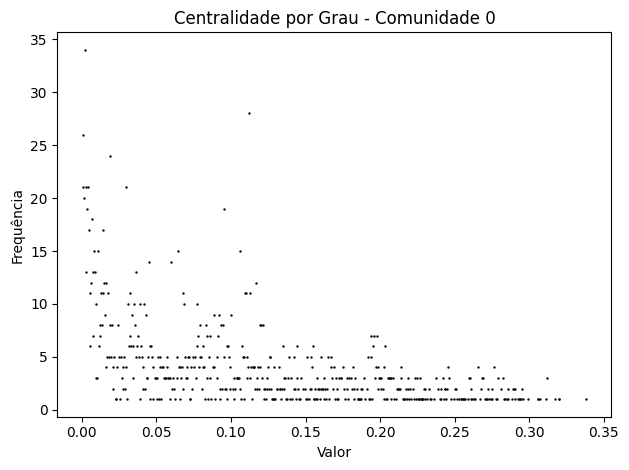

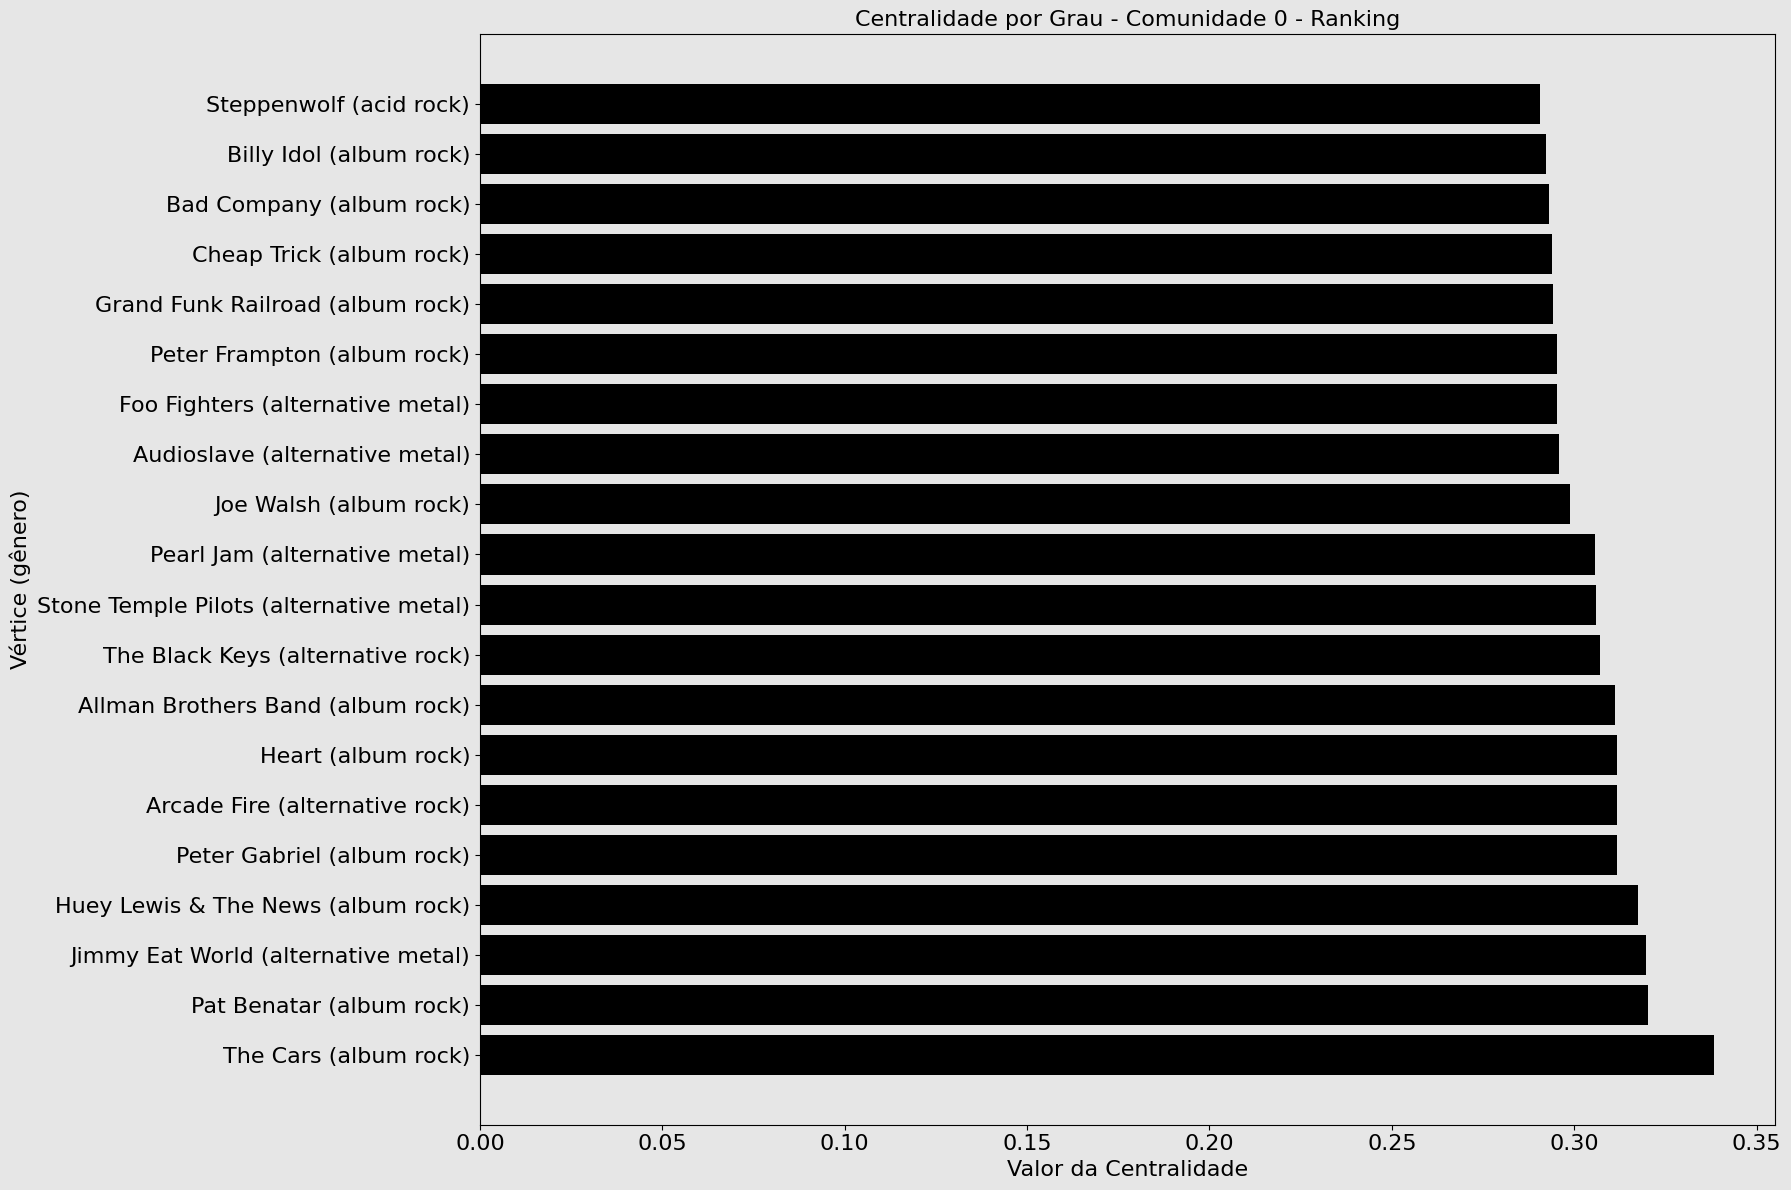

In [16]:
degree_centrality=G_Community.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau - Comunidade {number_community}', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title=f'Centralidade por Grau - Comunidade {number_community} - Ranking', name_network=f'{name_network}_community_{number_community}', label='genre')

#### **Community 9**

In [17]:
number_community = 9
nodes_community = list(sorted_louvain_communities[number_community])
G_Community = create_newtok_based_on_a_community(G_from_Bipartite, nodes_community)

In [18]:
print(f'Number of nodes: {G_Community.get_number_of_nodes()}')
print(f'Number of edges: {G_Community.get_number_of_edges()}')
print(f'Number of components: {G_Community.get_number_connected_components()}')
print(f'Smallest degree in the network: {G_Community.get_minimum_degree()}')
print(f'Largest degree in the network: {G_Community.get_maximum_degree()}')
print(f'Average degree of the network: {G_Community.get_average_degree()}')
print(f'Network density: {G_Community.get_density()}')
print(f'Average distance: {G_Community.average_shortest_path_length()}')
average_clustering_coefficient, percentage_of_considered_nodes = G_Community.get_average_clustering_coefficient()
print(f'Average clustering coefficient: {average_clustering_coefficient} ({percentage_of_considered_nodes:.2%} of the network was considered in the calculation, which have a degree greater than one)')

Number of nodes: 452
Number of edges: 9857
Number of components: 1
Smallest degree in the network: 1
Largest degree in the network: 157
Average degree of the network: 43.61504424778761
Network density: 0.09670741518356454
Average distance: 2.7526048309557916
Average clustering coefficient: 0.8676980439615738 (99.12% of the network was considered in the calculation, which have a degree greater than one)


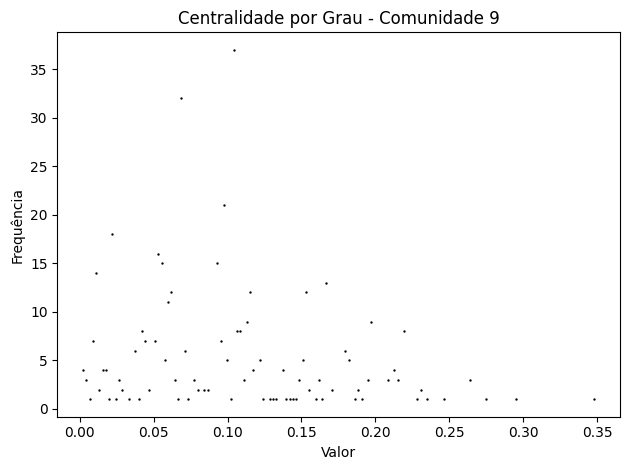

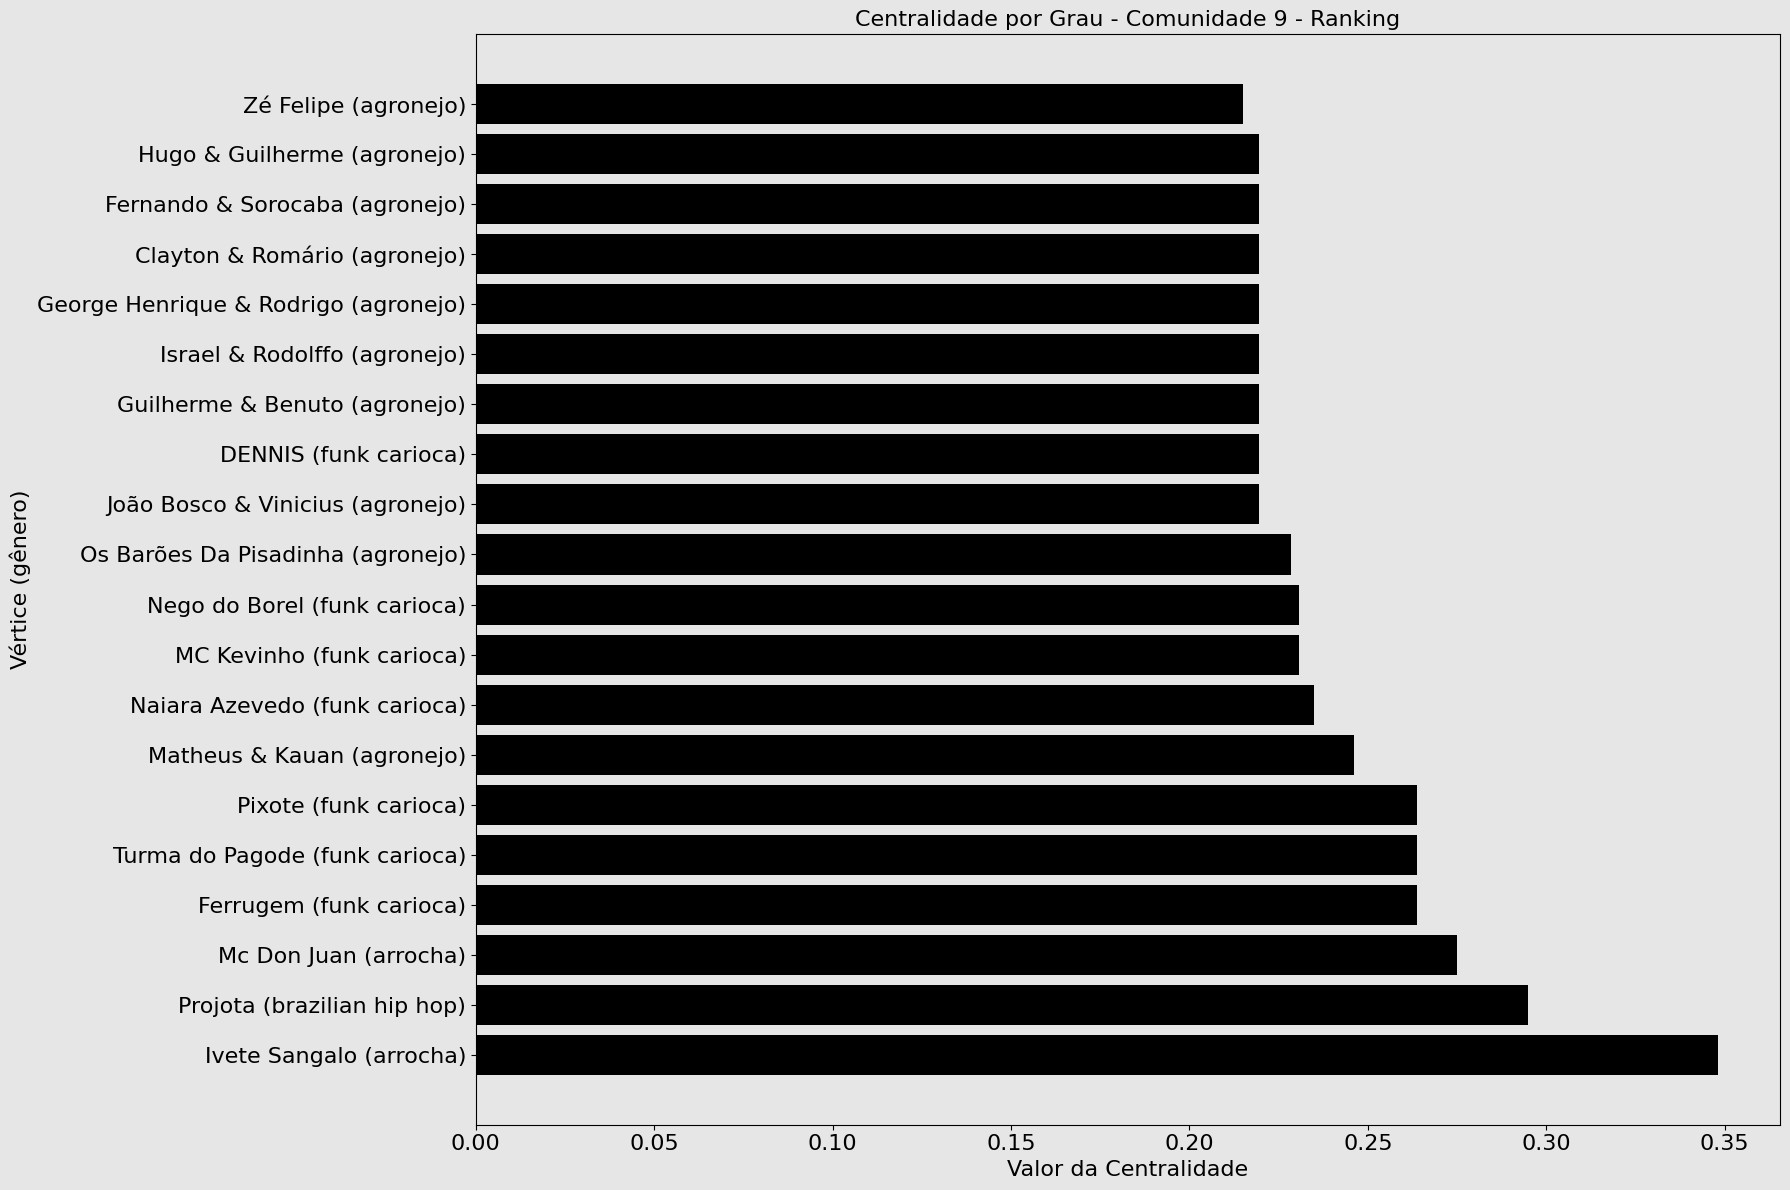

In [19]:
degree_centrality=G_Community.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau - Comunidade {number_community}', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title=f'Centralidade por Grau - Comunidade {number_community} - Ranking', name_network=f'{name_network}_community_{number_community}', label='genre')

#### **Community 22**

In [20]:
number_community = 22
nodes_community = list(sorted_louvain_communities[number_community])
G_Community = create_newtok_based_on_a_community(G_from_Bipartite, nodes_community)

In [21]:
print(f'Number of nodes: {G_Community.get_number_of_nodes()}')
print(f'Number of edges: {G_Community.get_number_of_edges()}')
print(f'Number of components: {G_Community.get_number_connected_components()}')
print(f'Smallest degree in the network: {G_Community.get_minimum_degree()}')
print(f'Largest degree in the network: {G_Community.get_maximum_degree()}')
print(f'Average degree of the network: {G_Community.get_average_degree()}')
print(f'Network density: {G_Community.get_density()}')
print(f'Average distance: {G_Community.average_shortest_path_length()}')
average_clustering_coefficient, percentage_of_considered_nodes = G_Community.get_average_clustering_coefficient()
print(f'Average clustering coefficient: {average_clustering_coefficient} ({percentage_of_considered_nodes:.2%} of the network was considered in the calculation, which have a degree greater than one)')

Number of nodes: 157
Number of edges: 3003
Number of components: 1
Smallest degree in the network: 1
Largest degree in the network: 96
Average degree of the network: 38.254777070063696
Network density: 0.24522292993630573
Average distance: 2.135554466764658
Average clustering coefficient: 0.898660822559901 (98.73% of the network was considered in the calculation, which have a degree greater than one)


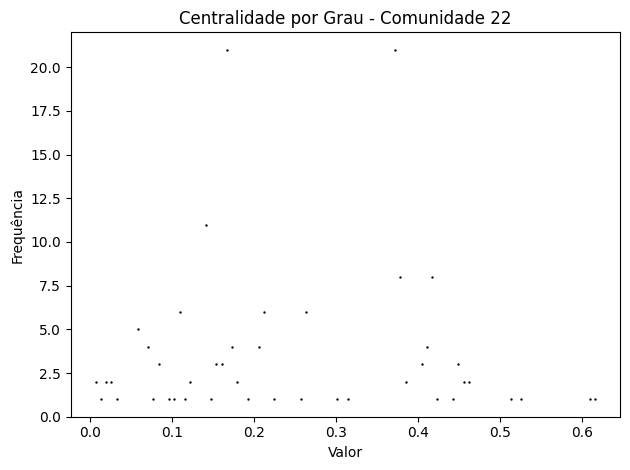

/home/gabrielprenassi/Faculdade/Matérias/redes_complexas/Trabalho Final/UFSJ_Redes_Complexas_Trabalho_Final/code/Graphics/Graphics.py:99: UserWarning: Glyph 24043 (\N{CJK UNIFIED IDEOGRAPH-5DEB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/gabrielprenassi/Faculdade/Matérias/redes_complexas/Trabalho Final/UFSJ_Redes_Complexas_Trabalho_Final/code/Graphics/Graphics.py:99: UserWarning: Glyph 21855 (\N{CJK UNIFIED IDEOGRAPH-555F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/gabrielprenassi/Faculdade/Matérias/redes_complexas/Trabalho Final/UFSJ_Redes_Complexas_Trabalho_Final/code/Graphics/Graphics.py:99: UserWarning: Glyph 36066 (\N{CJK UNIFIED IDEOGRAPH-8CE2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/gabrielprenassi/Faculdade/Matérias/redes_complexas/Trabalho Final/UFSJ_Redes_Complexas_Trabalho_Final/code/Graphics/Graphics.py:99: UserWarning: Glyph 20778 (\N{CJK UNIFIED IDEOGRAPH-512A}) missing from font(s) DejaVu Sans.
  plt.tight_layou

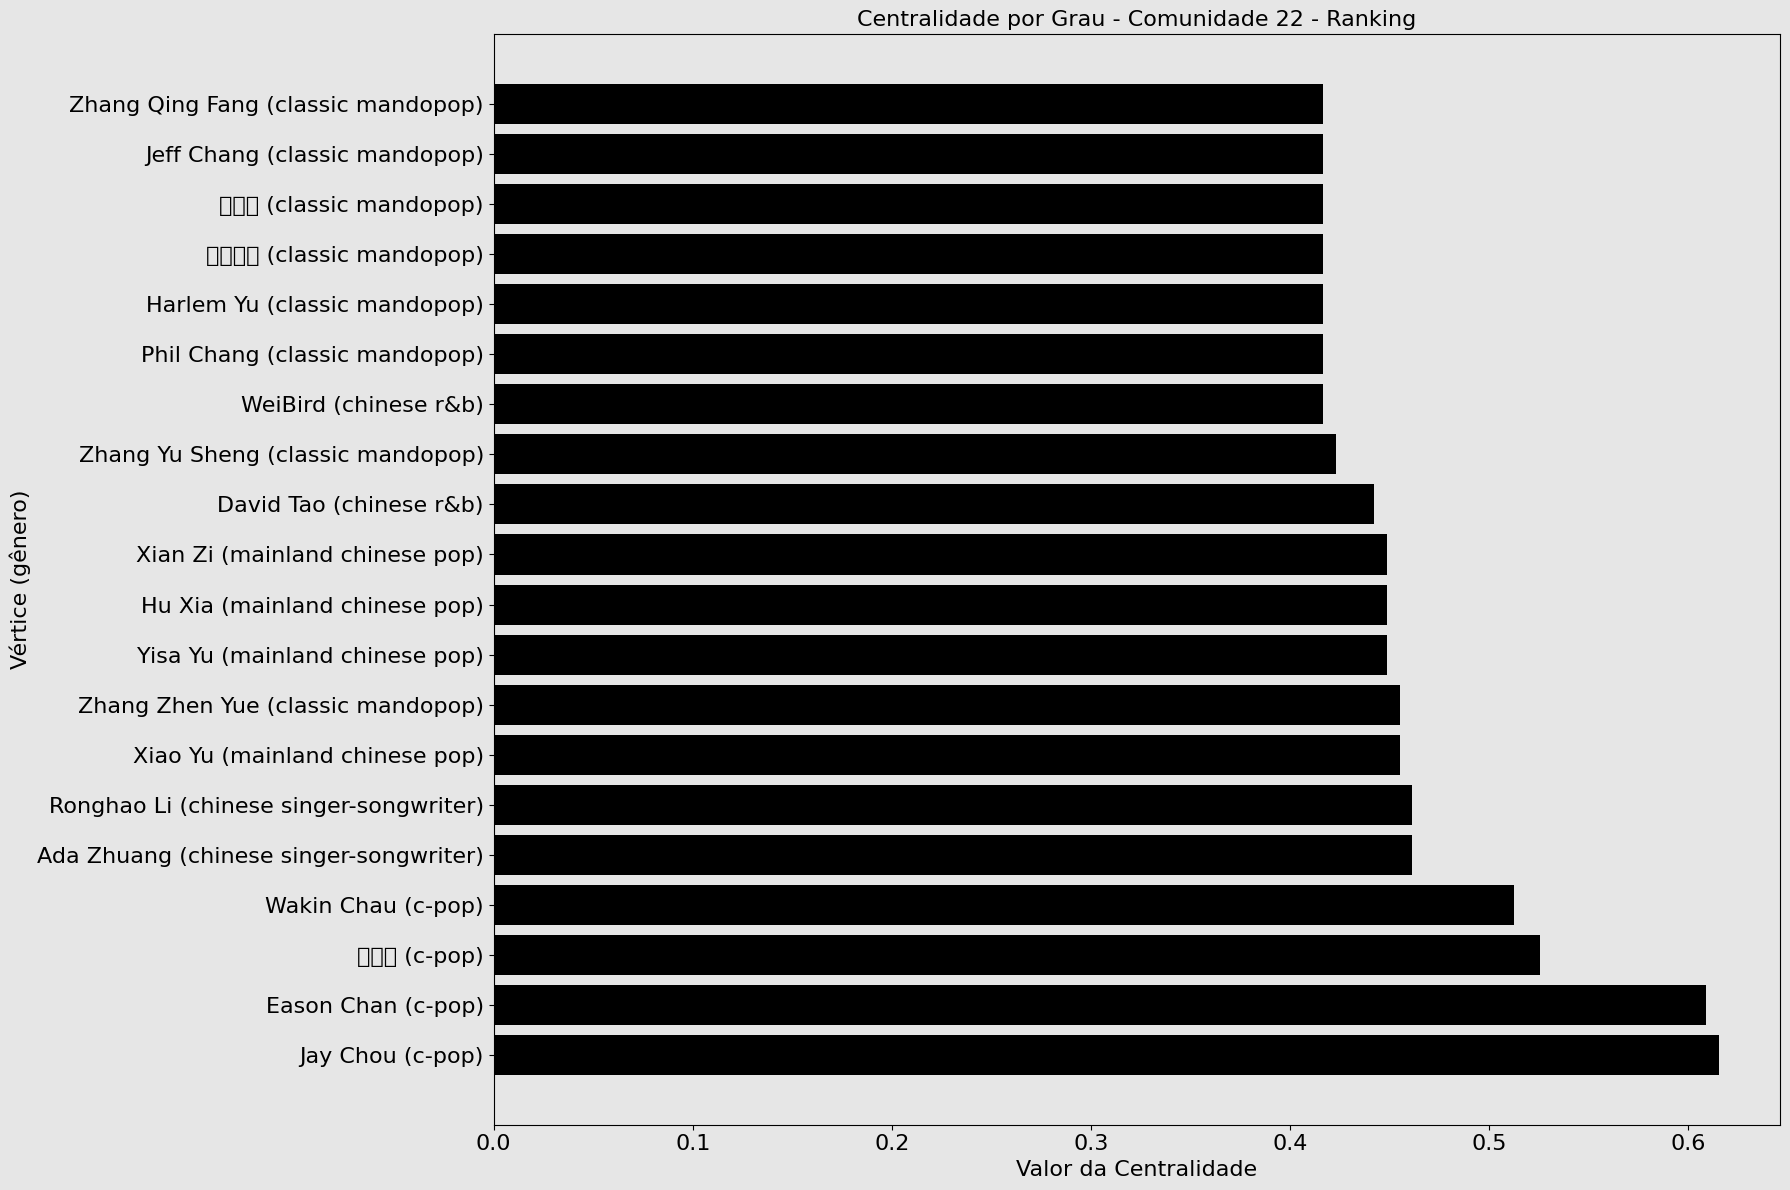

In [22]:
degree_centrality=G_Community.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau - Comunidade {number_community}', name_network=f'{name_network}_community_{number_community}')
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_from_Bipartite, title=f'Centralidade por Grau - Comunidade {number_community} - Ranking', name_network=f'{name_network}_community_{number_community}', label='genre')

In [23]:
sadasdas.append()

NameError: name 'sadasdas' is not defined

# **Creating the complex network related to the Stronger Connection Recommender**



In [ ]:
genres = {}
for index in range(len(df)):
    for genre_artist in df['genres'][index].split(', '):
        if genre_artist not in genres: genres[genre_artist] = []
        genres[genre_artist].append(df['id'][index])

In [ ]:
connections = []
for genre in genres:
    for i in range(len(genres[genre])):
        for j in range(i+1, len(genres[genre])):
           artist_1, artist_2 = (genres[genre][i], genres[genre][j]) if genres[genre][i] < genres[genre][j] else (genres[genre][j], genres[genre][i])
           connections.append((artist_1, artist_2))

In [ ]:
counter = Counter(connections)
edges = []
for artists, weight in counter.items():
    artist_1, artist_2 = artists
    edges.append((artist_1, artist_2, weight))

In [ ]:
G_ = SimpleGraph()
artists_nodes = [(df['id'][index], dict(popularity=int(df['popularity'][index]), name=str(df['name'][index]), genre=str(df['genres'][index].split(', ')[0]))) for index in range(len(df['id']))]
G.add_nodes(artists_nodes)
G.add_edges(edges)

## **Analisando a rede**

### **Informações báiscas**

In [ ]:
print(f'Quantidade de vértices: {G.get_number_of_nodes()}')
print(f'Quantidade de arestas: {G.get_number_of_edges()}')
print(f'Quantidade de componentes: {G.get_number_connected_components()}')
print(f'Menor grau da rede: {G.get_minimum_degree()}')
print(f'Maior grau da rede: {G.get_maximum_degree()}')
print(f'Grau médio da rede: {G.get_average_degree()}')
print(f'Densidade da rede: {G.get_density()}')
#print(f'Distância média: {G.average_shortest_path_length()}')
#average_clustering_coefficient, percentage_of_considered_nodes = G.get_average_clustering_coefficient()
#print(f'Coeficiente de clustering médio: {average_clustering_coefficient} (apenas {percentage_of_considered_nodes:.2%} da rede foi considerada no cálculo, que que possuem grau maior do que um)')

In [ ]:
'''import os 

edges_list = [(a, b) for a, b, _ in edges]

df = pd.DataFrame(edges_list)

df.to_csv(f'gephi_edges_list.csv', index=False, header=False)'''

### **Distribuição de graus**

In [ ]:
frequencies_of_degrees, probability_of_degrees, accumulated_probability_of_degress = G.get_degree_distribution()
#Graphics.create_graphic_degrees(data = frequencies_of_degrees, xLabel = 'Grau (K)', yLabel = 'Frequência', title = 'Frequência dos Graus', limit = 5, lines = False, name_network = name_network)
#Graphics.create_graphic_degrees(data = probability_of_degrees, xLabel = 'Grau (K)', yLabel = 'P(k)', title = 'Probabilidade dos Graus', limit = 0.01, lines = False,  name_network = name_network)
Graphics.create_graphic_degrees(data = accumulated_probability_of_degress, xLabel = 'Grau (k)', yLabel = 'P(>=K)', title = 'Função de Distribuição Cumulativa Complementar', limit = 0.05, lines = True,  name_network = name_network)

### **Centralidades**

#### **Centralidade por Grau**

In [ ]:
#degree_centrality=G.get_degree_centrality()
#analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title='Centralidade por Grau', name_network=name_network)
#Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G, title='Centralidade por Grau - Rede Completa - Ranking', name_network=name_network, label='genre')

In [ ]:
#eigenvector_centrality=G.get_eigenvector_centrality(weight='weight')
#analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title='Centralidade por Autovetor', name_network=name_network)
#Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G, title='Centralidade por Autovetor - Ranking', name_network=name_network)

### **Comunidades**

In [ ]:
#louvain_communities = G.get_louvain_communities(weight='weight')

In [ ]:
#sorted_louvain_communities = sorted(louvain_communities, key=len, reverse=True)

In [ ]:
#for index, community in enumerate(sorted_louvain_communities):
#    print(f'Comunidade {index+1:2}', end=' ')
#    community_list = []
#    for artist_id in community:
#        community_list.append(G.graph.nodes[artist_id]['name'])
#    print(f'({len(community_list):4}): ', community_list)
#    if len(community_list) == 1: print(G.get_degree(artist_id))

In [ ]:
'''for number in range(1):
    edges_community_aux = []
    nodes_community = list(sorted_louvain_communities[number])
    for i in range(len(nodes_community)):
        for j in range(i+1, len(nodes_community)):
           if G.graph.has_edge(nodes_community[i], nodes_community[j]) or G.graph.has_edge(nodes_community[j], nodes_community[i]):    
              artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])
              edges_community_aux.append((artist_1, artist_2))
    counter = Counter(edges_community_aux)
    edges_community = []
    for artists, weight in counter.items():
        artist_1, artist_2 = artists
        edges_community.append((artist_1, artist_2, weight))'''

In [ ]:
'''number = 51
edges_community_aux = []
nodes_community = list(sorted_louvain_communities[number])
for i in range(len(nodes_community)):
    for j in range(i+1, len(nodes_community)):
        if G.graph.has_edge(nodes_community[i], nodes_community[j]) or G.graph.has_edge(nodes_community[j], nodes_community[i]):    
            artist_1, artist_2 = (nodes_community[i], nodes_community[j]) if nodes_community[i] < nodes_community[j] else (nodes_community[j], nodes_community[i])
            edges_community_aux.append((artist_1, artist_2))
    counter = Counter(edges_community_aux)
    edges_community = []
    for artists, weight in counter.items():
        if weight != 1: print('a')
        artist_1, artist_2 = artists
        edges_community.append((artist_1, artist_2, weight))'''

In [ ]:
'''G_community = SimpleGraph()
artists_nodes = [(df['id'][int(df[df['id'] == node].index[0])], dict(popularity=int(df['popularity'][int(df[df['id'] == node].index[0])]), name=str(df['name'][int(df[df['id'] == node].index[0])]), genre=str(df['genres'][int(df[df['id'] == node].index[0])].split(', ')[0]))) for node in nodes_community]
G_community.add_nodes(artists_nodes)
G_community.add_edges(edges_community)
print(G_community.get_number_of_nodes())
print(G_community.get_number_of_edges())'''

In [ ]:
'''for a in G_community.graph.edges():
    a1, a2 = a
    print(df['name'][int(df[df['id'] == a1].index[0])], ',',df['name'][int(df[df['id'] == a2].index[0])])'''

In [ ]:
''''degree_centrality=G_community.get_degree_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=degree_centrality, title=f'Centralidade por Grau - Comunidade de Música Brasileira', name_network=name_network)
Graphics.create_ranking_centrality(centrality=degree_centrality, graph=G_community, title=f'Centralidade por Grau - Comunidade DE Música Brasileira - Ranking', name_network=name_network, label='genre')'''

In [ ]:
'''eigenvector_centrality=G_community.get_eigenvector_centrality(weight='weight')
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor - Comunidade {number}', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_community, title=f'Centralidade por Autovetor - Comunidade {number} - Ranking', name_network=name_network, label='genre')'''

In [ ]:
'''eigenvector_centrality=G_community.get_eigenvector_centrality()
analysis_centrality=Graphics.create_graphic_centrality(data=eigenvector_centrality, title=f'Centralidade por Autovetor - Comunidade {number}', name_network=name_network)
Graphics.create_ranking_centrality(centrality=eigenvector_centrality, graph=G_community, title=f'Centralidade por Autovetor - Comunidade {number} - Ranking', name_network=name_network)'''

## **Recomendador**

In [ ]:
analysis = {}
counter_nan=0
for index in tqdm(range(len(df))):
    if type(df['related_artists_ids'][index]) == float: 
        counter_nan+=1
        continue

    related_artists_ids = df['related_artists_ids'][index].split(', ')
    number_recommendations = len(related_artists_ids)

    recommender = StrongerConnectionsRecommender(G, number_recommendations)
    recommended_artists = recommender.make_recommendations(df['id'][index], collaborations=False)

    #if len(recommended_artists) == number_recommendations:
    counter=0
    for artist_id in recommended_artists:
        if artist_id in related_artists_ids:
            counter+=1
    analysis[df['id'][index]] =  counter/len(recommended_artists) 

In [ ]:
len(df)

In [ ]:
counter_nan # quantidade de nan

In [ ]:
len(analysis) # quantidade total que pegamos

In [ ]:
len(df) - (len(analysis) + counter_nan) # quantidade que n consegumis pegar igual

In [ ]:
total_correct_mean = sum(analysis.values())/len(analysis.values())
print(total_correct_mean)

In [ ]:
len(analysis)

In [ ]:
'''analysis = {}
for index in tqdm(range(len(df))):
    if type(df['related_artists_ids'][index]) == float: continue

    related_artists_ids = df['related_artists_ids'][index].split(', ')
    number_recommendations = len(related_artists_ids)
    recommender = StrongerConnectionsRecommender(G, number_recommendations)
    recommended_artists = recommender.make_recommendations(df['id'][index], collaborations=True)

    if len(recommended_artists) == number_recommendations:
        counter=0
        for artist_id in related_artists_ids:
            if artist_id in recommended_artists:
                counter+=1
        analysis[df['id'][index]] =  counter/number_recommendations'''

In [ ]:
'''total_correct_mean = sum(analysis.values())/len(analysis.values())
print(total_correct_mean)'''

In [ ]:
'''recommender.convert_recommendations(artist_id, artists_ids)'''

In [ ]:
'''recommender.make_recommendations(artist_id, collaborations=True)
recommender.convert_recommendations(artist_id, artists_ids)'''